# Install Dependencies and Bring in Data

In [1]:
##!pip install tensorflow pandas matplotlib sklearn

In [2]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np

In [3]:
df = pd.read_csv('comment_train.csv')

In [4]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [5]:
df.iloc[7]['comment_text']

"Your vandalism to the Matt Shirvington article has been reverted.  Please don't do it again, or you will be banned."

In [6]:
df[df.columns[2:]].iloc[5]

toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
Name: 5, dtype: int64

In [7]:
!pip list

Package                       Version
----------------------------- ---------------
absl-py                       2.1.0
aiobotocore                   2.5.0
aiofiles                      22.1.0
aiohttp                       3.8.5
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
altair                        5.2.0
anaconda-anon-usage           0.4.2
anaconda-catalogs             0.2.0
anaconda-client               1.12.1
anaconda-cloud-auth           0.1.3
anaconda-navigator            2.5.0
anaconda-project              0.11.1
annotated-types               0.6.0
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
async-time

In [8]:
from tensorflow.keras.layers import TextVectorization

In [9]:
## Spliting data into dependent and independent variable
X = df['comment_text']
y = df[df.columns[2:]].values

In [10]:
X

0         Explanation\nWhy the edits made under my usern...
1         D'aww! He matches this background colour I'm s...
2         Hey man, I'm really not trying to edit war. It...
3         "\nMore\nI can't make any real suggestions on ...
4         You, sir, are my hero. Any chance you remember...
                                ...                        
159566    ":::::And for the second time of asking, when ...
159567    You should be ashamed of yourself \n\nThat is ...
159568    Spitzer \n\nUmm, theres no actual article for ...
159569    And it looks like it was actually you who put ...
159570    "\nAnd ... I really don't think you understand...
Name: comment_text, Length: 159571, dtype: object

In [11]:
y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=int64)

In [12]:
df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [13]:
df['comment_text']

0         Explanation\nWhy the edits made under my usern...
1         D'aww! He matches this background colour I'm s...
2         Hey man, I'm really not trying to edit war. It...
3         "\nMore\nI can't make any real suggestions on ...
4         You, sir, are my hero. Any chance you remember...
                                ...                        
159566    ":::::And for the second time of asking, when ...
159567    You should be ashamed of yourself \n\nThat is ...
159568    Spitzer \n\nUmm, theres no actual article for ...
159569    And it looks like it was actually you who put ...
159570    "\nAnd ... I really don't think you understand...
Name: comment_text, Length: 159571, dtype: object

In [14]:
MAX_FEATURES = 200000  # number of words in the words


In [15]:
vectorizer = TextVectorization(max_tokens = MAX_FEATURES,
                              output_sequence_length=1800,
                              output_mode='int')

In [16]:
import warnings
warnings.filterwarnings("ignore")
warnings.resetwarnings()

vectorizer.adapt(X.values)

In [17]:
vectorizer('Hello world, life is great')[:5]

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([288, 263, 306,   9, 275], dtype=int64)>

In [18]:
vectorizer.get_vocabulary()

['',
 '[UNK]',
 'the',
 'to',
 'of',
 'and',
 'a',
 'you',
 'i',
 'is',
 'that',
 'in',
 'it',
 'for',
 'this',
 'not',
 'on',
 'be',
 'as',
 'have',
 'are',
 'your',
 'with',
 'if',
 'article',
 'was',
 'or',
 'but',
 'page',
 'my',
 'an',
 'from',
 'by',
 'do',
 'at',
 'about',
 'me',
 'so',
 'wikipedia',
 'can',
 'what',
 'there',
 'all',
 'has',
 'will',
 'talk',
 'please',
 'would',
 'its',
 'no',
 'one',
 'just',
 'like',
 'they',
 'he',
 'dont',
 'which',
 'any',
 'been',
 'should',
 'more',
 'we',
 'some',
 'other',
 'who',
 'see',
 'here',
 'also',
 'his',
 'think',
 'im',
 'because',
 'know',
 'how',
 'am',
 'people',
 'why',
 'edit',
 'articles',
 'only',
 'out',
 'up',
 'when',
 'were',
 'use',
 'then',
 'may',
 'time',
 'did',
 'them',
 'now',
 'being',
 'their',
 'than',
 'thanks',
 'even',
 'get',
 'make',
 'good',
 'had',
 'very',
 'information',
 'does',
 'could',
 'well',
 'want',
 'such',
 'sources',
 'way',
 'name',
 'these',
 'deletion',
 'pages',
 'first',
 'help'

In [19]:
vectorized_text = vectorizer(X.values)

In [20]:
vectorized_text

<tf.Tensor: shape=(159571, 1800), dtype=int64, numpy=
array([[  645,    76,     2, ...,     0,     0,     0],
       [    1,    54,  2489, ...,     0,     0,     0],
       [  425,   441,    70, ...,     0,     0,     0],
       ...,
       [32445,  7392,   383, ...,     0,     0,     0],
       [    5,    12,   534, ...,     0,     0,     0],
       [    5,     8,   130, ...,     0,     0,     0]], dtype=int64)>

In [21]:
## MCSHBAP - map, cache, shuffle, batch, prefetch from_tensor_slices, list_files
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8)  # helps bottlenecks

In [22]:
batch_X, batch_y = dataset.as_numpy_iterator().next()

In [23]:
batch_X

array([[1683,   80,    2, ...,    0,    0,    0],
       [ 128,   94,  133, ...,    0,    0,    0],
       [   6,  241,   43, ...,    0,    0,    0],
       ...,
       [   5,    2, 9016, ...,    0,    0,    0],
       [   8, 1509,    3, ...,    0,    0,    0],
       [ 165,  100,  332, ...,    0,    0,    0]], dtype=int64)

In [24]:
batch_y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0]], dtype=int64)

In [25]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [26]:
train_generator = train.as_numpy_iterator()

In [27]:
train_generator.next()

(array([[   8,  710,   61, ...,    0,    0,    0],
        [4347,   26,  963, ...,    0,    0,    0],
        [ 134,    6,  117, ...,    0,    0,    0],
        ...,
        [ 812,  806,  341, ...,    0,    0,    0],
        [ 185,   10,   12, ...,    0,    0,    0],
        [ 387,  972,   36, ...,    0,    0,    0]], dtype=int64),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 1, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]], dtype=int64))

# Create Sequential Model

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [29]:
model = Sequential()
# Create the embedding layer 
model.add(Embedding(MAX_FEATURES+1, 32))
# Bidirectional LSTM Layer
model.add(Bidirectional(LSTM(32, activation='tanh')))
# Feature extractor Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
# Final layer 
model.add(Dense(6, activation='sigmoid'))

In [30]:
import warnings
warnings.filterwarnings("ignore")
warnings.resetwarnings()
model.compile(loss='BinaryCrossentropy', optimizer='Adam')

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          6400032   
                                                                 
 bidirectional (Bidirection  (None, 64)                16640     
 al)                                                             
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                        

In [32]:
import warnings
warnings.filterwarnings("ignore")
warnings.resetwarnings()

history = model.fit(train, epochs=1, validation_data = val)

6981/6981 [==============================] - 7537s 1s/step - loss: 0.0620 - val_loss: 0.0485


In [33]:
history.history

{'loss': [0.062046267092227936], 'val_loss': [0.04851529747247696]}

In [34]:
from matplotlib import pyplot as plt

<Figure size 800x500 with 0 Axes>

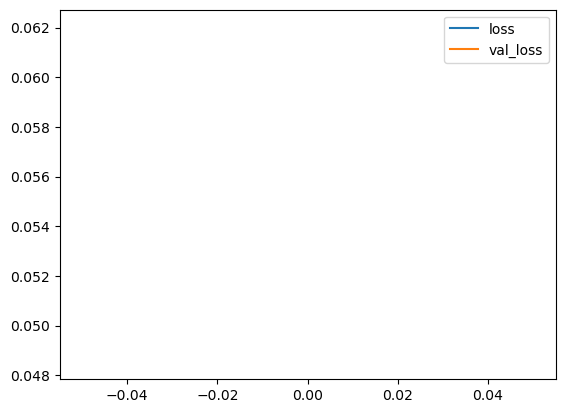

In [35]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

# Make Predictions

In [36]:
input_text = vectorizer('you freaking suck!')
batch = test.as_numpy_iterator().next()

In [37]:
input_text

<tf.Tensor: shape=(1800,), dtype=int64, numpy=array([   7, 7158,  397, ...,    0,    0,    0], dtype=int64)>

In [38]:
batch = test.as_numpy_iterator().next()

In [39]:
batch_X, batch_y = test.as_numpy_iterator().next()

In [40]:
batch_y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 1],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=int64)

In [41]:
batch_X

array([[   23,     7,    55, ...,     0,     0,     0],
       [   76,    20,     7, ...,     0,     0,     0],
       [14892,   674, 61316, ...,     0,     0,     0],
       ...,
       [31598,    94,    13, ...,     0,     0,     0],
       [  387,   490, 20415, ...,     0,     0,     0],
       [  104,  2917,     8, ...,     0,     0,     0]], dtype=int64)

In [42]:
(model.predict(batch_X) > 0.5).astype(int)

1/1 [==============================] - 2s 2s/step


array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [43]:
res = model.predict(batch_X)

1/1 [==============================] - 0s 212ms/step


In [44]:
res

array([[1.97014049e-01, 3.24749039e-04, 1.61781106e-02, 4.50727995e-03,
        2.94724647e-02, 1.48005020e-02],
       [4.35955346e-01, 3.83150787e-03, 7.38166422e-02, 1.77192185e-02,
        1.03944793e-01, 4.61284965e-02],
       [7.06679523e-02, 2.05777120e-04, 8.72904714e-03, 4.66420129e-03,
        1.63642187e-02, 1.13908518e-02],
       [3.42911202e-03, 4.94640560e-08, 8.07834731e-05, 2.82538731e-05,
        2.41421920e-04, 1.51594839e-04],
       [1.36025622e-01, 4.84659366e-04, 1.54859135e-02, 6.83918083e-03,
        2.80591622e-02, 1.74635239e-02],
       [9.09648955e-01, 3.44909020e-02, 5.87276042e-01, 2.94517130e-02,
        4.42971051e-01, 7.30338767e-02],
       [1.88937113e-01, 2.81680928e-04, 1.48622040e-02, 3.99988657e-03,
        2.72431839e-02, 1.35239149e-02],
       [5.42058982e-03, 1.72457604e-07, 1.58337149e-04, 6.19621569e-05,
        4.56119335e-04, 2.88253097e-04],
       [6.79758051e-03, 3.97474992e-07, 2.44118972e-04, 1.09045504e-04,
        6.59438025e-04, 

#  Model Evaluation

In [45]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [46]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [47]:
for batch in test.as_numpy_iterator(): 
    # Unpack the batch 
    X_true, y_true = batch
    # Make a prediction 
    yhat = model.predict(X_true)
    
    # Flatten the predictions
    y_true = y_true.flatten()
    yhat = yhat.flatten()
    
    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)

1/1 [==============================] - 0s 308ms/step


1/1 [==============================] - 0s 317ms/step


1/1 [==============================] - 0s 324ms/step


1/1 [==============================] - 0s 313ms/step


1/1 [==============================] - 0s 224ms/step


1/1 [==============================] - 0s 264ms/step


1/1 [==============================] - 0s 183ms/step


In [48]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision: 0.8022412657737732, Recall:0.7020478844642639, Accuracy:0.4934804439544678


# Test and Gradio

In [49]:
import warnings
warnings.filterwarnings("ignore")
warnings.resetwarnings()
!pip install gradio jinja2

C:\Users\nk141\anaconda3\Lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedWriter name=4>
  return process_handler(cmd, _system_body)
C:\Users\nk141\anaconda3\Lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedReader name=5>
  return process_handler(cmd, _system_body)
C:\Users\nk141\anaconda3\Lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedReader name=6>
  return process_handler(cmd, _system_body)


In [50]:
## pip show fsspec


Name: fsspec
Version: 2023.12.2
Summary: File-system specification
Home-page: https://github.com/fsspec/filesystem_spec
Author: 
Author-email: 
License: BSD
Location: C:\Users\nk141\anaconda3\Lib\site-packages
Requires: 
Required-by: dask, datasets, gradio_client, huggingface-hub, intake, s3fs, torch
Note: you may need to restart the kernel to use updated packages.


In [51]:
## pip install --upgrade fsspec


Note: you may need to restart the kernel to use updated packages.


In [52]:
import tensorflow as tf
import gradio as gr

C:\Users\nk141\anaconda3\Lib\site-packages\pydantic\_internal\_config.py:272: PydanticDeprecatedSince20: Support for class-based `config` is deprecated, use ConfigDict instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.6/migration/
  warnings.warn(DEPRECATION_MESSAGE, DeprecationWarning)


In [53]:
model.save('toxicity.h5')

C:\Users\nk141\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [54]:
model = tf.keras.models.load_model('toxicity.h5')

In [58]:
input_str = vectorizer('hey i freaken hate you! I am coming for you. I\'m going to hurt you!')

In [59]:
res = model.predict(np.expand_dims(input_str, 0))

1/1 [==============================] - 0s 295ms/step


In [60]:
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [61]:
res

array([[0.70364726, 0.01750187, 0.272894  , 0.03034959, 0.26958364,
        0.08028895]], dtype=float32)

In [76]:
pip install --upgrade gradio


Note: you may need to restart the kernel to use updated packages.


C:\Users\nk141\anaconda3\Lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedWriter name=12>
  return process_handler(cmd, _system_body)
C:\Users\nk141\anaconda3\Lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedReader name=13>
  return process_handler(cmd, _system_body)
C:\Users\nk141\anaconda3\Lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedReader name=14>
  return process_handler(cmd, _system_body)


In [79]:
import gradio as gr

# Assuming you have your vectorizer and model defined earlier

def score_comment(comment):
    vectorized_comment = vectorizer.transform([comment])
    results = model.predict(vectorized_comment)
    
    text = ''
    for idx, col in enumerate(df.columns[2:]):
        text += '{}: {}\n'.format(col, results[0][idx] > 0.5)
    
    return text

interface = gr.Interface(fn=score_comment,
                     inputs=gr.Textbox(lines=2, placeholder='Comment to score'),
                     outputs=gr.Textbox())

C:\Users\nk141\anaconda3\Lib\site-packages\gradio\routes.py:821: DeprecationWarning: 
        on_event is deprecated, use lifespan event handlers instead.

        Read more about it in the
        [FastAPI docs for Lifespan Events](https://fastapi.tiangolo.com/advanced/events/).
        
  @app.on_event("startup")
C:\Users\nk141\anaconda3\Lib\site-packages\fastapi\applications.py:4495: DeprecationWarning: 
        on_event is deprecated, use lifespan event handlers instead.

        Read more about it in the
        [FastAPI docs for Lifespan Events](https://fastapi.tiangolo.com/advanced/events/).
        
  return self.router.on_event(event_type)


In [80]:
interface.launch(share=True)

C:\Users\nk141\anaconda3\Lib\site-packages\gradio\networking.py:170: ResourceWarning: unclosed <socket.socket fd=5236, family=2, type=1, proto=0>
  s = socket.socket()
C:\Users\nk141\anaconda3\Lib\site-packages\gradio\networking.py:170: ResourceWarning: unclosed <socket.socket fd=5208, family=2, type=1, proto=0>
  s = socket.socket()


Running on local URL:  http://127.0.0.1:7869
Running on public URL: https://c732a8faba30a26d8a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


C:\Users\nk141\anaconda3\Lib\site-packages\starlette\templating.py:172: DeprecationWarning: The `name` is not the first parameter anymore. The first parameter should be the `Request` instance.
Replace `TemplateResponse(name, {"request": request})` by `TemplateResponse(request, name)`.
  warnings.warn(
Traceback (most recent call last):
  File "C:\Users\nk141\anaconda3\Lib\site-packages\gradio\queueing.py", line 495, in call_prediction
    output = await route_utils.call_process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\nk141\anaconda3\Lib\site-packages\gradio\route_utils.py", line 232, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\nk141\anaconda3\Lib\site-packages\gradio\blocks.py", line 1561, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\nk141\anaconda3\Lib\site-packages\gradio\blocks.py", line 1179, in ca